<a href="https://colab.research.google.com/github/tripathiosho/ImportantNotebooks/blob/main/KNN_Business_Case-class2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2

Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100% 14.6k/14.6k [00:00<00:00, 25.1MB/s]


In [ ]:
df=pd.read_csv('multiclass.csv')
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


In [ ]:
df['class'].value_counts()

,count
class,
2,180
3,173
1,87


In [ ]:
X=df[['Region', 'Fresh',    'Milk', 'Grocery',  'Frozen',   'Detergents_Paper', 'Delicassen'    ]].copy()
y=df[['class']].copy()


In [ ]:
X.shape

(440, 7)

In [ ]:
y.shape

(440, 1)

In [ ]:
# for this data i would need visualization power of 8 D

#find a way to make it visible in 2D

# JUST FOR VISIALIZATION PURPOSE PCA

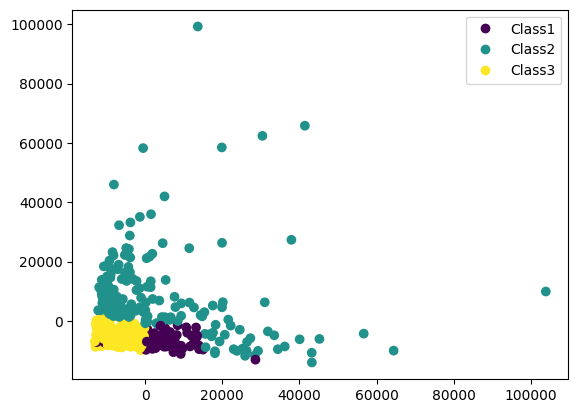

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


def scatter_visualize(visualize1,visualize2,y_label):
  scatter = plt.scatter(visualize[:,0] ,visualize[:,1],c = y.values[:,0] )
  plt.legend(handles=scatter.legend_elements()[0], labels=['Class1','Class2','Class3'])
  plt.show()

# reducing features to just 2 features for visualization purpose
pca = PCA(n_components=2)
visualize = pca.fit_transform(X)


scatter_visualize(visualize[:,0] ,visualize[:,1],y.values[:,0])

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.25, random_state=42)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(247, 7) (247, 1)
(83, 7) (83, 1)
(110, 7) (110, 1)


In [ ]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smt = SMOTE()

X_sm, y_sm = smt.fit_resample(X_train, y_train)

y_sm.value_counts()

,count
class,
1,99
2,99
3,99


In [ ]:
from sklearn.preprocessing import StandardScaler

st =  StandardScaler()

X_sm = st.fit_transform(X_sm.values)
X_val_scaled = st.transform(X_val.values)
X_test_scaled = st.transform(X_test.values)

y_sm = y_sm.values[:,0]
y_val = y_val.values[:,0]
y_test = y_test.values[:,0]

In [ ]:
#KNN implementation from scratch

X_val_scaled[50]

array([ 0.67904386, -0.62268699, -0.44157378, -0.65214632, -0.32001864,
       -0.49961943, -0.28361085])

In [ ]:
dist = np.sqrt(np.sum((X_sm - X_val_scaled[50])**2, axis=1))

In [ ]:
dist.shape

(297,)

In [ ]:
#I WANT THE LABELS WITH THE DISTANCE THAT WE HAVE CALCULATED


y_sm

array([2, 1, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 2, 3, 1, 1, 1, 2, 1, 3, 2, 1,
       2, 3, 3, 3, 3, 3, 2, 1, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2,
       1, 2, 1, 3, 3, 1, 3, 3, 2, 2, 2, 3, 1, 3, 2, 1, 1, 1, 2, 1, 3, 2,
       3, 3, 2, 3, 1, 3, 2, 2, 1, 3, 3, 3, 2, 2, 3, 3, 2, 3, 2, 3, 2, 2,
       3, 3, 2, 3, 3, 2, 1, 2, 2, 1, 3, 2, 1, 2, 1, 3, 2, 1, 1, 1, 2, 3,
       3, 2, 3, 2, 1, 2, 3, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 3, 2, 2, 3,
       2, 3, 1, 3, 1, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 3, 3, 1, 2, 1, 1,
       1, 3, 1, 1, 2, 3, 3, 3, 3, 2, 1, 3, 1, 3, 3, 3, 3, 2, 2, 3, 3, 2,
       2, 2, 1, 1, 1, 2, 3, 1, 3, 2, 3, 2, 3, 3, 1, 2, 2, 3, 2, 2, 3, 1,
       1, 3, 3, 2, 3, 3, 1, 2, 3, 1, 3, 1, 3, 2, 2, 2, 3, 1, 3, 1, 1, 2,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 1, 2, 2, 2, 3, 2, 1, 3, 1, 2, 3, 2, 2,
       3, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2])

In [ ]:
dist

array([ 2.79074106,  1.15429807,  3.94304342,  1.28457508,  0.70753183,
        2.95605325,  0.7023328 ,  0.50569225,  2.14843301,  0.52567707,
        2.56859963,  3.0585259 ,  7.02514631,  0.50094446,  1.45389787,
        1.42332121,  1.64488337,  4.06839896,  0.86344052,  2.68421505,
       12.42431747,  0.9400631 ,  1.59169982,  0.30342061,  2.57487906,
        1.32538801,  1.45108613,  2.58858166,  2.06545007,  0.92247969,
        2.90312511,  2.98681317,  8.03070736,  0.29796842,  0.41360243,
        0.98744871,  0.6908979 ,  1.36133334,  2.05547371,  2.57706813,
        0.56712128,  1.47339241,  5.25160081,  2.52644089,  0.90047027,
        1.69466503,  2.17025073,  0.61109678,  1.08373254,  1.09545009,
        0.39310015,  1.86552994,  4.48335702,  5.08656914,  1.80123161,
        2.74651858,  1.50782571,  0.32318458,  1.80738739,  2.50773532,
        2.04898852,  1.9673844 ,  3.03425848,  1.22147178,  1.34454791,
        1.43873082,  2.72611487,  2.69725026,  5.3257615 ,  0.55

In [ ]:
distances= [(dist[i], y_sm[i]) for i in range (len(dist))]

In [ ]:
distances

[(np.float64(2.790741057548839), np.int64(2)),
 (np.float64(1.1542980704444568), np.int64(1)),
 (np.float64(3.9430434157678933), np.int64(2)),
 (np.float64(1.284575082679863), np.int64(3)),
 (np.float64(0.707531826903895), np.int64(3)),
 (np.float64(2.9560532453488033), np.int64(2)),
 (np.float64(0.7023327968818955), np.int64(3)),
 (np.float64(0.5056922548485435), np.int64(3)),
 (np.float64(2.148433005671313), np.int64(2)),
 (np.float64(0.5256770693563123), np.int64(3)),
 (np.float64(2.568599627279199), np.int64(3)),
 (np.float64(3.0585258997513627), np.int64(2)),
 (np.float64(7.025146312904901), np.int64(2)),
 (np.float64(0.5009444627140118), np.int64(3)),
 (np.float64(1.4538978668364977), np.int64(1)),
 (np.float64(1.4233212142797593), np.int64(1)),
 (np.float64(1.6448833722455602), np.int64(1)),
 (np.float64(4.06839896357651), np.int64(2)),
 (np.float64(0.8634405223861181), np.int64(1)),
 (np.float64(2.6842150521924153), np.int64(3)),
 (np.float64(12.42431746660959), np.int64(2)),
 

In [ ]:
# sort the distances 2 and 3

distances= sorted(distances)

In [ ]:
distances

[(np.float64(0.20263608931312077), np.int64(3)),
 (np.float64(0.21426549258756397), np.int64(3)),
 (np.float64(0.2263888861612485), np.int64(3)),
 (np.float64(0.2845200652569991), np.int64(3)),
 (np.float64(0.29796842139483454), np.int64(3)),
 (np.float64(0.30342061476379456), np.int64(3)),
 (np.float64(0.32318457650929844), np.int64(3)),
 (np.float64(0.33157049833699614), np.int64(3)),
 (np.float64(0.3402730607777308), np.int64(3)),
 (np.float64(0.3561303418428012), np.int64(3)),
 (np.float64(0.3631782710017299), np.int64(3)),
 (np.float64(0.37286217341208205), np.int64(3)),
 (np.float64(0.3833780209686563), np.int64(3)),
 (np.float64(0.39310015407282517), np.int64(3)),
 (np.float64(0.4090936430068959), np.int64(3)),
 (np.float64(0.41096173652283224), np.int64(1)),
 (np.float64(0.4136024298176293), np.int64(3)),
 (np.float64(0.41639506387977815), np.int64(1)),
 (np.float64(0.4437896836645168), np.int64(3)),
 (np.float64(0.44729063064522934), np.int64(3)),
 (np.float64(0.48768346610476

In [ ]:
#define k
k=5
dister = distances[:k]

In [ ]:
dister

[(np.float64(0.20263608931312077), np.int64(3)),
 (np.float64(0.21426549258756397), np.int64(3)),
 (np.float64(0.2263888861612485), np.int64(3)),
 (np.float64(0.2845200652569991), np.int64(3)),
 (np.float64(0.29796842139483454), np.int64(3))]

In [ ]:
def knn(X,Y,queryPoint,k):
    """Predict the class label for the query point"""
    # Euclidean Distance
    dist = np.sqrt(np.sum((queryPoint-X)**2,axis=1) )

    # Storing distance and Class labels together
    distances = [(dist[i],Y[i]) for i in range(len(dist)) ]
    # sort the distances
    distances = sorted(distances)
    # Nearest/First K points
    distances = distances[:k]

    distances = np.array(distances)

    classes_counts = np.unique(distances[:,1],return_counts=True)

    index = classes_counts[1].argmax()
    pred = classes_counts[0][index]

    return int(pred),distances

In [ ]:
knn(X_sm,y_sm,X_val_scaled[1],10)

(2,
 array([[0.42881554, 2.        ],
        [0.65800891, 2.        ],
        [0.86658428, 2.        ],
        [0.95163317, 2.        ],
        [1.00895259, 2.        ],
        [1.1404244 , 2.        ],
        [1.29129653, 2.        ],
        [1.36330899, 2.        ],
        [1.36506204, 2.        ],
        [1.37645263, 2.        ]]))

In [ ]:
y_pred = []

for i in range(X_test_scaled.shape[0]):
    output,_ = knn(X_sm, y_sm, X_test_scaled[i],5)
    y_pred.append(output)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           1       0.85      0.65      0.74        26
           2       0.77      0.95      0.85        38
           3       0.98      0.91      0.94        46

    accuracy                           0.86       110
   macro avg       0.86      0.84      0.84       110
weighted avg       0.87      0.86      0.86       110



In [ ]:
#sklearn implementation

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn= KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [ ]:
knn.fit(X_sm, y_sm)

KNeighborsClassifier(metric='euclidean')

In [ ]:
y_pred= knn.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.85      0.65      0.74        26
           2       0.77      0.95      0.85        38
           3       0.98      0.91      0.94        46

    accuracy                           0.86       110
   macro avg       0.86      0.84      0.84       110
weighted avg       0.87      0.86      0.86       110



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix(y_test, y_pred)

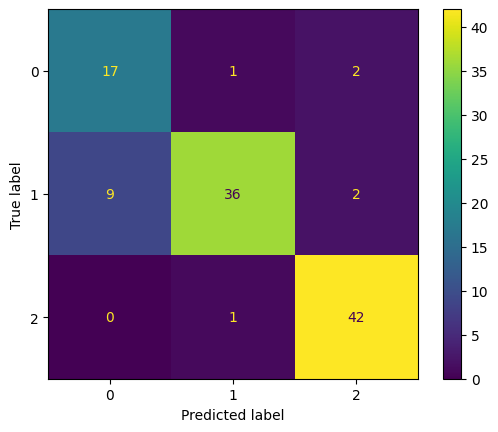

In [ ]:
ConfusionMatrixDisplay(cm).plot()


In [ ]:
Acc = []

# Calculating error for K values between 1 and 50
# Note: 51 is not included in the loop
for i in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(X_sm, y_sm)

    Acc.append(knn.score(X_val_scaled,y_val))

Text(0, 0.5, 'Accuracy')

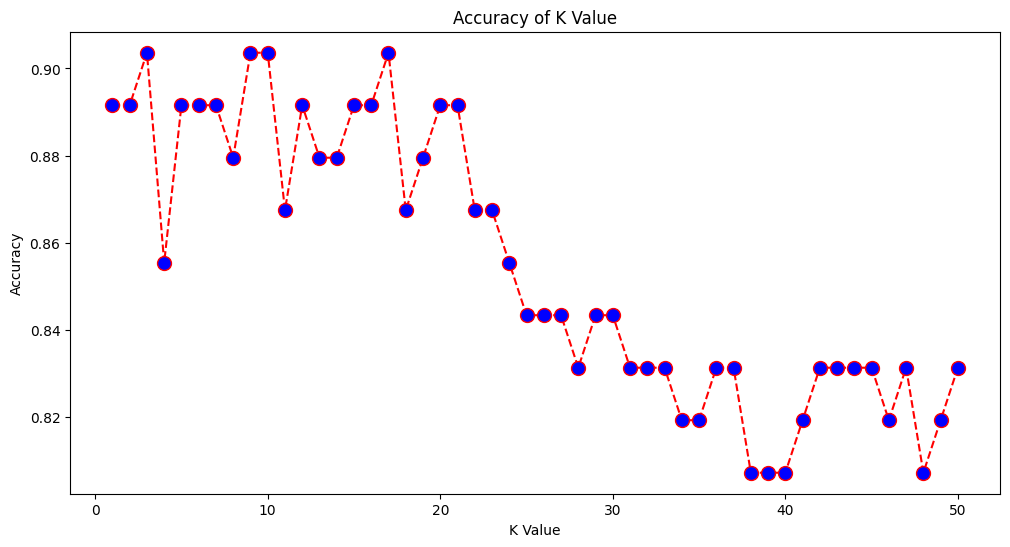

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 51), Acc, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy of K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

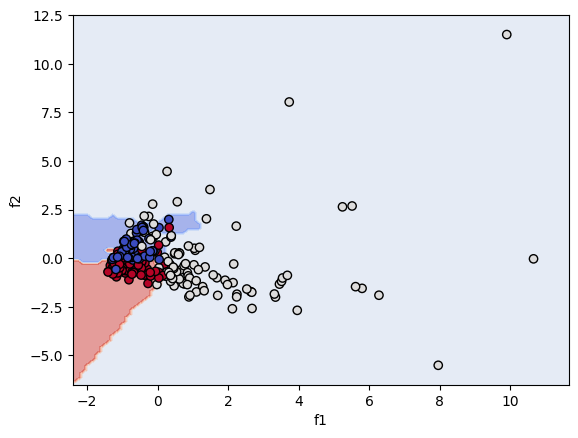

In [ ]:
#MORE VISALIZATION

import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier

# Choosing the first 2 columns for the plot


pca = PCA(n_components=2)
X_train_cols = pca.fit_transform(X_sm)

# Creating and fitting the tree classifier

classifier = KNeighborsClassifier(n_neighbors=5,metric='euclidean')

classifier.fit(X_train_cols, y_sm)

# Plotting the tree boundaries
disp = DecisionBoundaryDisplay.from_estimator(classifier,
                                              X_train_cols,
                                              response_method="predict",
                                              xlabel='f1', ylabel='f2',
                                              alpha=0.5,
                                              cmap=plt.cm.coolwarm)

# Plotting the data points
disp.ax_.scatter(X_train_cols[:, 0], X_train_cols[:, 1],
                 c=y_sm, edgecolor="k",
                 cmap=plt.cm.coolwarm)


plt.show()

In [ ]:

df=pd.read_csv('multiclass.csv')
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


In [ ]:
df.isnull().sum()

,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0
class,0


In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html

In [ ]:
#Imputation for completing missing values using k-Nearest Neighbors.

#Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set.

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
imputer = KNNImputer(n_neighbors=3)

In [ ]:
imputed_data= imputer.fit_transform(X_sm)